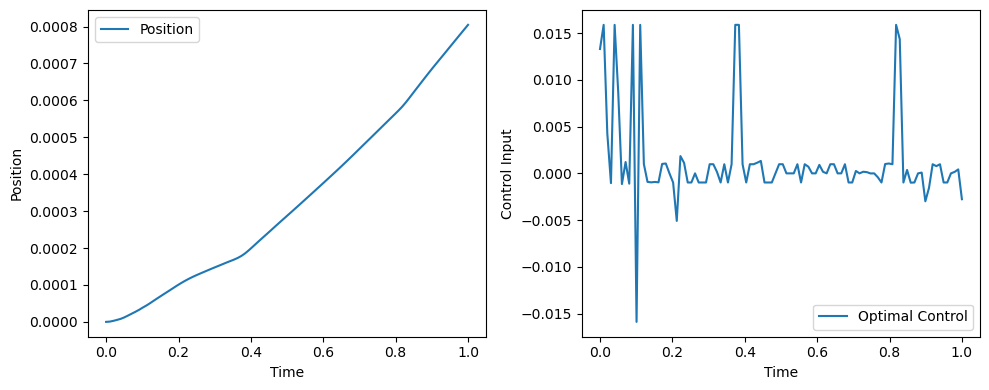

Optimal Control: [ 1.33008583e-02  1.58838531e-02  4.25444139e-03 -1.04648887e-03
  1.58838531e-02  8.57417024e-03 -1.14565170e-03  1.21172244e-03
 -1.10160818e-03  1.58838531e-02 -1.58838531e-02  1.58838531e-02
  9.94523134e-04 -9.13137187e-04 -9.61978817e-04 -9.18568386e-04
 -9.59292256e-04  1.00803528e-03  1.05491036e-03  0.00000000e+00
 -9.76313640e-04 -5.08482555e-03  1.84706151e-03  1.11978365e-03
 -9.76313640e-04 -9.76313640e-04  0.00000000e+00 -9.76313640e-04
 -9.76313640e-04 -9.76313640e-04  9.76313640e-04  9.76313640e-04
  1.53293530e-04 -9.76313640e-04  9.76313640e-04 -9.76313640e-04
  9.76313640e-04  1.58838531e-02  1.58838531e-02  9.76313640e-04
 -9.76313640e-04  9.76313640e-04  9.76313640e-04  1.13686032e-03
  1.32977655e-03 -9.76313640e-04 -9.76313640e-04 -9.76313640e-04
  0.00000000e+00  9.76313640e-04  9.76313640e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.76313640e-04 -9.76313640e-04
  9.76313640e-04  7.12591058e-04  0.00000000e+00  0.00000000e+00
  9.0891